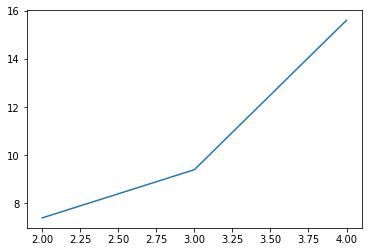

In [17]:
import sys
import os
import re
import numpy
import math
import optparse
import matplotlib.pyplot as plt

#This is for the one dimensional case

class env_1:

    def __init__(self):
        self.l = 0

    def percept(self,a):
        if a.curr == self.l:
            a.moves += 1
            return 1
        else:
            a.moves += 1
            return 0

class agent_1:

    def __init__(self):
        self.curr = 0  #l/2 this is the true position
        self.moves = 0

    def move(self):
        
        r = numpy.random.randint(2)
        direction = 0
        if r == 0:
            direction = 1
        elif r == 1:
            direction = -1
        self.curr = self.curr + direction
    
    def check_state(self,e):

        if 0 <= self.curr <= e.l:
            return 1

        return 0
    
#L defines size of state space
#Here 0, 1, ..., L
L = 4

#Number of iterations
N = 5
    
plot_y = []
plot_x = list(range(2,L+1))

for lindex in range(2, L+1):
    temp_sum = []
    n = N
    
    while n:
        a1 = agent_1()
        e1 = env_1()
        f1 = 0

        l  = lindex
        a1.curr = int(math.ceil(l/2))
        e1.l = l
        e1.a = a1.curr

        while 1:
            prev_state = a1.curr
            a1.move()
            t = a1.check_state(e1)
            if t == 0:
                a1.curr = prev_state
            s = e1.percept(a1)
            if s == 1:
                temp_sum.append(a1.moves)
                break

        n = n - 1

    avg = sum(temp_sum)/float(N)
    plot_y.append(avg)

plt.plot(plot_x,plot_y)
plt.show()

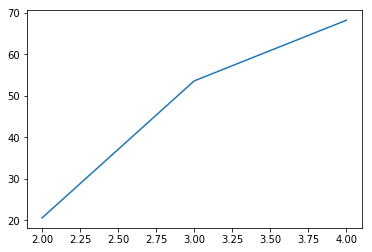

In [18]:
#This is for the two dimensional case

class env_2:

    def __init__(self):
        self.l = 0
        
    def percept(self,a):   
        
        # eq to satisfy is x + y = l*D
        if a.curr[0] + a.curr[1] == (self.l)*2:
            a.moves += 1
            #print(a.moves)
            return 1
        else:
            a.moves += 1
            return 0

class agent_2:

    def __init__(self):
        self.curr = numpy.array([0,0])  # index 0 = x coordinate
        self.moves = 0

    def move(self):

        r = numpy.random.randint(4)
        direction = numpy.array([0,0])

        if r == 0:                  #right
            direction[0] = 1
            direction[1] = 0

        if r == 1:                 #left
            direction[0] = -1
            direction[1] = 0

        if r == 2:                  #up
            direction[0] = 0
            direction[1] = 1

        if r == 3:                  #down
            direction[0] = 0
            direction[1] = -1

        self.curr = self.curr + direction

    def check_state(self,e):

        if self.curr[0] <= e.l and self.curr[0] >= 0 and self.curr[1] <= e.l and self.curr[1] >= 0:
            return 1
        return 0

plot_y = []
plot_x = list(range(2, L+1))

for lindex in range(2, L+1):
    n = N
    temp_sum = []
    while n:

        a2 = agent_2()
        e2 = env_2()

        l = lindex
        k = int(math.ceil(l/2))
        a2.curr = numpy.array([k,k])
        e2.l = l
        e2.a = a2.curr


        while 1:
            prev_state = a2.curr
            a2.move()
            t = a2.check_state(e2)
            if t == 0:
                a2.curr = prev_state
            s = e2.percept(a2) 
            if s == 1:
                temp_sum.append(a2.moves)
                break
        n = n-1    
    avg = sum(temp_sum)/float(N) 
    plot_y.append(avg)

plt.plot(plot_x, plot_y)
plt.show()

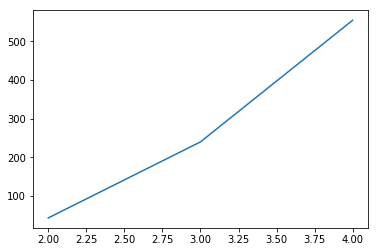

In [20]:
#This is for the three dimensional case

class env_3:

    def __init__(self):
        self.l = 0

    def percept(self,a): 
        # eq to satisfy is x + y + z = l*D
        if a.curr[0] + a.curr[1] + a.curr[2] == (self.l)*3:
             a.moves += 1
             #print(a.moves)
             return 1
        else:
            a.moves += 1
            return 0

class agent_3():

    def __init__(self):
        self.curr = numpy.array([0,0,0])
        self.moves = 0

    def move(self):

        r = numpy.random.randint(6)
        direction = numpy.array([0,0,0]) # x y z

        if r == 0:              # rigth on plane
            direction[0] = 1
            direction[1] = 0
            direction[2] = 0

        if r == 1:              # left on plane
            direction[0] =-1
            direction[1] = 0
            direction[2] = 0

        if r == 2:              # down on plane
            direction[0] = 0
            direction[1] = -1
            direction[2] = 0

        if r == 3:              # up on plane
            direction[0] = 0
            direction[1] = 1
            direction[2] = 0

        if r == 4:              # up |_ to plane
            direction[0] = 0
            direction[1] = 0
            direction[2] = 1

        if r == 5:              # down |_ to plane
            direction[0] = 0
            direction[1] = 0
            direction[2] = -1

        self.curr = self.curr + direction

    def check_state(self,e):
        c1 = self.curr[0] >= 0 and self.curr[0] <= e.l
        c2 = self.curr[1] >= 0 and self.curr[1] <= e.l
        c3 = self.curr[2] >= 0 and self.curr[2] <= e.l

        if c1 and c2 and c3:
            return 1

        return 0

plot_y = []
plot_x = list(range(2, L+1))

for lindex in range(2, L+1):
    n = N
    temp_sum = []

    while n:

        a3 = agent_3()
        e3 = env_3()

        l = lindex
        k = int(math.ceil(l/2))
        a3.curr = numpy.array([k,k,k])
        e3.l = l
        e3.a = a3.curr

        while 1:
            prev_state = a3.curr
            a3.move()
            t = a3.check_state(e3)
            if t == 0:
                a3.curr = prev_state
            s = e3.percept(a3)
            if s == 1:
                temp_sum.append(a3.moves)
                break
        n = n-1    
    avg = sum(temp_sum)/float(N)
    plot_y.append(avg)

plt.plot(plot_x, plot_y)
plt.show()